In [1]:
import pandas as pd
from decouple import config
import re

In [2]:
DATA_PATH = config("DATA_PATH")

In [3]:
df_tmp = pd.read_csv(filepath_or_buffer=f"{DATA_PATH}/csv/spotify.csv", index_col="Unnamed: 0")

In [4]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18835 entries, 0 to 18834
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         18835 non-null  object 
 1   song_popularity   18835 non-null  object 
 2   song_duration_ms  18835 non-null  object 
 3   acousticness      18835 non-null  object 
 4   danceability      18835 non-null  object 
 5   energy            18835 non-null  object 
 6   instrumentalness  18835 non-null  object 
 7   key               18835 non-null  float64
 8   liveness          18835 non-null  object 
 9   loudness          18835 non-null  object 
 10  audio_mode        18835 non-null  object 
 11  speechiness       18835 non-null  object 
 12  tempo             18835 non-null  object 
 13  time_signature    18835 non-null  object 
 14  audio_valence     18834 non-null  float64
dtypes: float64(2), object(13)
memory usage: 2.3+ MB


                key  audio_valence
count  18835.000000   18834.000000
mean       5.288674       0.527958
std        3.614624       0.244635
min        0.000000       0.000000
25%        2.000000       0.335000
50%        5.000000       0.526500
75%        8.000000       0.725000
max       11.000000       0.984000


<Axes: >

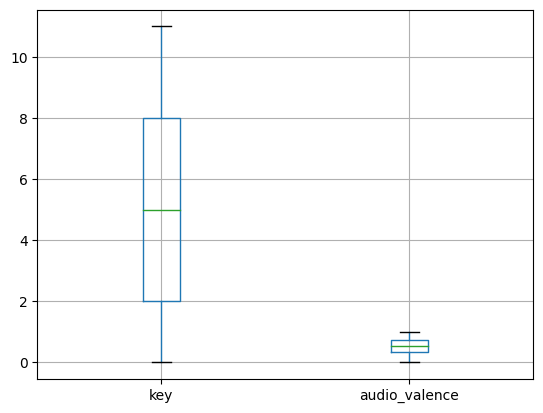

In [5]:
print(df_tmp.describe())
df_tmp.boxplot()

In [6]:
df_tmp

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520000000000001kg,0.496mol/L,0.682,2.94e-05,8.0,0.0589,-4.095,1,0.0294,167.06,4,0.474
1,In The End,66,216933,0.0103kg,0.542mol/L,0.853,0.0,3.0,0.108,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.00817kg,0.737mol/L,0.463,0.447,0.0,0.255,-7.8279999999999985,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.0264kg,0.451mol/L,0.97,0.00355,0.0,0.102,-4.938,1,0.107,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954kg,0.447mol/L,0.7659999999999999,0.0,10.0,0.113,-5.065,1,0.0313,172.011,4,0.574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18830,Let It Breathe,60,159645,0.893kg,0.5mol/L,0.151,6.54e-05,11.0,0.111,-16.107,1,0.0348,113.969,4,0.300
18831,Answers,60,205666,0.765kg,0.495mol/L,0.161,1.33e-06,11.0,0.105,-14.078,0,0.0301,94.286,4,0.265
18832,Sudden Love (Acoustic),23,182211,0.847kg,0.7190000000000001mol/L,0.325,0.0,0.0,0.125,-12.222,1,0.0355,130.534,4,0.286
18833,Gentle on My Mind,55,352280,0.945kg,0.488mol/L,0.326,0.0157,3.0,0.119,-12.02,1,0.0328,106.063,4,0.323


In [7]:
str_ = "0.005520000000000001kg"

In [8]:
# Regex para reconhecer entradas no formato do cpf
cpf = "047.564789-00"
pattern_cpf = r"([0-9]){3}.([0-9]){3}.([0-9]){3}-([0-9]){2}"

In [9]:
# Padrão para ficar somente com números e pontos
pattern = r"[^0-9.]"

In [10]:
def cleaning_string (string:str, pattern:re) : 
    
    return float(re.sub(pattern=pattern, repl="", string=string))
    

In [11]:
df_tmp["acousticness"] = df_tmp["acousticness"].apply(lambda x: cleaning_string(string=x, pattern=pattern))

In [12]:
df_tmp["danceability"] = df_tmp["danceability"].apply(lambda x: cleaning_string(string=x, pattern=pattern))

In [13]:
str_ = "2.94e-05"

In [14]:
pattern_expo = r"([0-9]).([0-9]){2}e-([0-9]+)"

In [15]:
def cleaning_string (string:str, pattern:re, replace:bool=True, **kwargs) : 
    
    if replace:
        return re.sub(pattern=pattern, repl="", string=string)
    else:
        if re.match(pattern=pattern, string=string) :
            return kwargs["type_to_cast"](string)
        else :
            try : 
                return float(string)
            except:
                print(string)
                return 0

In [16]:
str_ = "2.94e-05"

cleaning_string(string=str_, pattern=pattern_expo, type_to_cast=float, replace=False)

2.94e-05

In [17]:
df_tmp["instrumentalness"] = df_tmp["instrumentalness"].apply( 
    lambda x: cleaning_string(string=x, pattern=pattern_expo, replace=False, type_to_cast=float))

nao_sei
nao_sei
